In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

## When will we see BOE

In [184]:

ice = pd.read_csv('ice.csv.bz2', sep = '\t')
ice = ice[ice['region'] == 'N']
ice.isna().sum()

ice[ice["extent"] < 0]

ice = ice.drop([218,220])

# loaded data and keep only the northern hemisphere, drop the extreme extent data

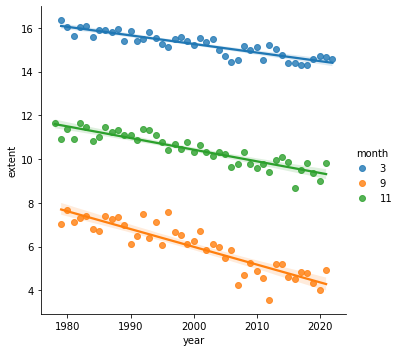

In [185]:
temp = ice[(ice.month == 9) | (ice.month == 3) | (ice.month == 11)].copy()


_ = sns.lmplot(y = "extent", x = 'year',hue = 'month', data=temp)


# it seems like March always has the highest extent

In [186]:
temp_sep = temp[temp.month == 9].copy()

m = smf.ols('extent ~ year', data = temp_sep).fit()
m.summary()

# extent = b0 + b1 * year 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.38e-15
Time:                        00:55:42   Log-Likelihood:                -32.490
No. Observations:                  43   AIC:                             68.98
Df Residuals:                      41   BIC:                             72.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.2503     12.966     12.977      0.000     142.066     194.435
year          -0.0811      0.006    -12.515      0.000      -0.094      -0.068
==============================================================================
Omnibus:                        2.538   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.495
Skew:                          -0.321   Prob(JB):                        0.474
Kurtosis:                       3.649   Cond. No.                     3.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
# the slope mean that year increase, the extent will decrease by 0.0811 unit
# the p value is 0 and it falls outside of the 95% confidence interval,
# therefore it is  statistically significant

In [188]:
temp_sep['relative_year'] = temp_sep['year'] - 2000
m = smf.ols('extent ~ relative_year', data = temp_sep).fit()
m.summary()

# a): it means that in year 0, the extent will be 168.2503 
#  it has a p value of 0, which makes it statistically significant
# b): it means that in year 2000, the extent should be 5.9942
#  it has a p value of 0, which makes it statistically significant


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.38e-15
Time:                        00:55:42   Log-Likelihood:                -32.490
No. Observations:                  43   AIC:                             68.98
Df Residuals:                      41   BIC:                             72.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.9942      0.080     74.510      0.000       5.832       6.157
relative_year    -0.0811      0.006    -12.515      0.000      -0.094      -0.068
==============================================================================
Omnibus:                        2.538   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.495
Skew:                          -0.321   Prob(JB):                        0.474
Kurtosis:                       3.649   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

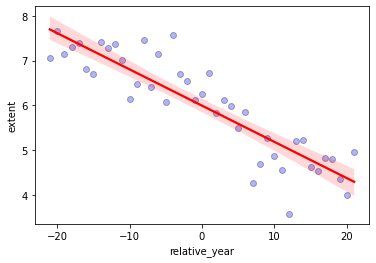

In [189]:

_ = sns.regplot(y = "extent", x = 'relative_year',
scatter_kws = {"color":"blue", "alpha":0.3, "edgecolor":"black"},
line_kws={"color":"red"},
data=temp_sep)

# the trend is that the extend is decreasing as the year increase
# I do not see a clear acceleration for the trend but there is a little bit 
# of deceleration at the end

In [190]:
# 7):

m = smf.ols('relative_year ~ extent', data = temp_sep).fit()
m.summary()

# according the prediction, the trend line will hit 0 at year 2058
# which is 26 years from 2022


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          relative_year   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.38e-15
Time:                        00:55:42   Log-Likelihood:                -135.49
No. Observations:                  43   AIC:                             275.0
Df Residuals:                      41   BIC:                             278.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.5562      4.762     12.298      0.000      48.940      68.172
extent        -9.7688      0.781    -12.515      0.000     -11.345      -8.192
==============================================================================
Omnibus:                        0.897   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.914
Skew:                          -0.196   Prob(JB):                        0.633
Kurtosis:                       2.403   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
temp_mar = temp[temp.month == 3].copy()
temp_mar['relative_year'] = temp_mar['year'] - 2000

m = smf.ols('relative_year ~ extent', data = temp_mar).fit()
m.summary()

# according the March data, we will reach BOE in 311 years

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          relative_year   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     167.3
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           3.05e-16
Time:                        00:55:42   Log-Likelihood:                -138.92
No. Observations:                  44   AIC:                             281.8
Df Residuals:                      42   BIC:                             285.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    311.8218     24.082     12.949      0.000     263.223     360.421
extent       -20.4249      1.579    -12.936      0.000     -23.611     -17.239
==============================================================================
Omnibus:                        1.701   Durbin-Watson:                   1.205
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                1.165
Skew:                          -0.089   Prob(JB):                        0.558
Kurtosis:                       2.223   Cond. No.                         420.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
# 6):

m = smf.ols('GmSc ~ FGA + FG', data = hd).fit()
m.summary()

# a):
# FG means in two games where Harden makes the same amount of field goal attempt,
# he will have 3 more point for every field goal he makes. it is statistically signigicant
# because of it has a p value of 0 and fit into 95% CI

# b):
# FGA means in two games where Harden make the same amount of field goal, for every
# field goal attempt he makes, his will score 0.55 less if he tried to make a field goal attempt
# it is statistically significant since it has a p value of 0.013, which fit in to the 95% CI

# c):
#  The reason is that model didn't include the field goal Harden miss and model two includes all the field goal Harden 
#  which will match the ones he miss as well.

# d):
# R square of the model is the value of how much the stat can represent the actual data. The higher
# R square value, the more we can trust the result. Model 1 has a very low R square value, which is 
# much lower than model 2. Therefore we should trust model 2's values more than model 1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     45.30
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           7.49e-13
Time:                        00:55:42   Log-Likelihood:                -199.48
No. Observations:                  65   AIC:                             405.0
Df Residuals:                      62   BIC:                             411.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9917      2.472      3.637      0.001       4.049      13.934
FGA           -0.5523      0.216     -2.553      0.013      -0.985      -0.120
FG             3.0427      0.363      8.383      0.000       2.317       3.768
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.069
Skew:                          -0.025   Prob(JB):                        0.966
Kurtosis:                       3.151   Cond. No.                         64.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
# 7):

m = smf.ols("GmSc ~ FGA + FG + ThreeP + ThreePA + FT + FTA + ORB + DRB + AST + STL + BLK + TOV + PF", data = hd).fit()
m.summary()

# a):

# all standard errores are close to 0
# and t value for some variables are extremely small and for other variables 
# are extremely big

# b):

# the R square for this model is 1, which mean this model can be trusted 

# c):

# it tells that when all other variables are the same, for  every turn over
# they Harden gets, he loses 1 point


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.619e+29
Date:                Sun, 10 Jul 2022   Prob (F-statistic):               0.00
Time:                        00:55:42   Log-Likelihood:                 1938.8
No. Observations:                  65   AIC:                            -3850.
Df Residuals:                      51   BIC:                            -3819.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.105e-15   2.68e-14     -0.266      0.792   -6.08e-14    4.66e-14
FGA           -0.7000   1.73e-15  -4.05e+14      0.000      -0.700      -0.700
FG             2.4000   2.62e-15   9.17e+14      0.000       2.400       2.400
ThreeP         1.0000   4.48e-15   2.23e+14      0.000       1.000       1.000
ThreePA    -6.578e-15   2.94e-15     -2.235      0.030   -1.25e-14    -6.7e-16
FT             1.4000   4.99e-15    2.8e+14      0.000       1.400       1.400
FTA           -0.4000   4.12e-15  -9.71e+13      0.000      -0.400      -0.400
ORB            0.7000   3.76e-15   1.86e+14      0.000       0.700       0.700
DRB            0.3000   1.77e-15   1.69e+14      0.000       0.300       0.300
AST            0.7000   1.43e-15   4.91e+14      0.000       0.700       0.700
STL            1.0000   4.06e-15   2.46e+14      0.000       1.000       1.000
BLK            0.7000   5.73e-15   1.22e+14      0.000       0.700       0.700
TOV           -1.0000    2.4e-15  -4.17e+14      0.000      -1.000      -1.000
PF            -0.4000   3.15e-15  -1.27e+14      0.000      -0.400      -0.400
==============================================================================
Omnibus:                        0.289   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.341
Skew:                           0.150   Prob(JB):                        0.843
Kurtosis:                       2.811   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
# 8):

# Game Score Formula=(Points)+0.4*(Field Goals Made)+0.7*(Offensive Rebounds)
#+0.3*(Defensive rebounds)+(Steals)+0.7*(Assists)+0.7*(Blocked Shots)
# - 0.7*(Field Goal Attempts)-0.4*(Free Throws Missed) – 0.4*(Personal Fouls)-(Turnovers)

# for the formula are majorly the same, for some calculation differences, some variables are different

### 4 Interpret Regression results in the literature

In [200]:
# 1):

# When all other variables are the same, when having a partner,
# mean having better mental health. 
# it is not statistically significant because the p value is 0.15,
# which does not fall into the 95% CI


In [201]:
# 2):

# covid-19 exposure means worse mental health
# it is not statistically significant because the p value is 0.129
# which does not fall into the 95% CI

In [202]:
# 3):

# financial distress means worse mental health
# it is statistically significant because the p value is less than 0.001
# which fall into the 95% CI

### I spent about 4 hours for this PS